In [1]:
import sys, os
import cmath
import numpy             as np
import numpy.linalg      as lin
import scipy             as sp
import scipy.integrate   as integ
import matplotlib.pyplot as plt

path_PythonCodeSet = "/Users/miiya/python_code-set"
sys.path.append(path_PythonCodeSet)

import common.statistics
import fitting.fitfunc_type
import fitting.io_params
import sch_diffeq.solve_diffeq
import Tmatrix.convert_mat
import Tmatrix.calc_phase_shift

hbar_c = 197.327053

In [2]:
ibase  = "/Users/miiya/Dropbox/programs/data/pacs-cs.LxLx_XxxN/c/ens1/fit"
ifname = "Pot.XccN0_XccN0.spin_0_.t15.bin_size57.fitparam"

In [3]:
Nch   = 1

mass1 = 1581.2
mass2 = 3801.2

#mass1 = 1215.3
#mass2 = 3672.6

TmpFuncName, TmpParams = fitting.io_params.input_params(ibase+"/"+ifname)
FuncName = np.array([[TmpFuncName ]])
Params   = np.array([[TmpParams   ]])
mass     = np.array([[mass1, mass2]])

fit_funcs = np.array([[fitting.fitfunc_type.set_fitfunc_from_fname(FuncName[ich][jch]) 
                       for jch in range(Nch)] for ich in range(Nch)])

# Successful to input fit parameters.
# N.conf   = 7
# N.param  = 6
# FuncName = 3G


In [4]:
Emin   = 0.0
Edel   = 1.0
Emax   = 300.0

N_E   = int((Emax - Emin) / Edel)
Edata = np.array([Emin + i*Edel for i in range(N_E)])

In [5]:
Rmax   = 6.0

Nconf  = len(Params[0,0,:,0])
Nparam = len(Params[0,0,0,:])
Tmat   = np.empty((Nconf, N_E, Nch, Nch), dtype=complex)
print("#\n# Calculate T-matrix...")
for iconf in range(Nconf):
    tmpParams = np.array([[[Params[ich,jch,iconf,iparam]
                            for iparam in range(Nparam)] for jch in range(Nch)] for ich in range(Nch)])
    Tmat[iconf,:,:,:] = sch_diffeq.solve_diffeq.solve_sch_diff(fit_funcs, tmpParams, mass, Edata, Rmax)
    print("# Calculate T-matrix... end: iconf=%03d" % iconf)
Tmatrix.convert_mat.convert_TtoS(Tmat)

#
# Calculate T-matrix...
# Calculate T-matrix... end: iconf=000
# Calculate T-matrix... end: iconf=001
# Calculate T-matrix... end: iconf=002
# Calculate T-matrix... end: iconf=003
# Calculate T-matrix... end: iconf=004
# Calculate T-matrix... end: iconf=005
# Calculate T-matrix... end: iconf=006


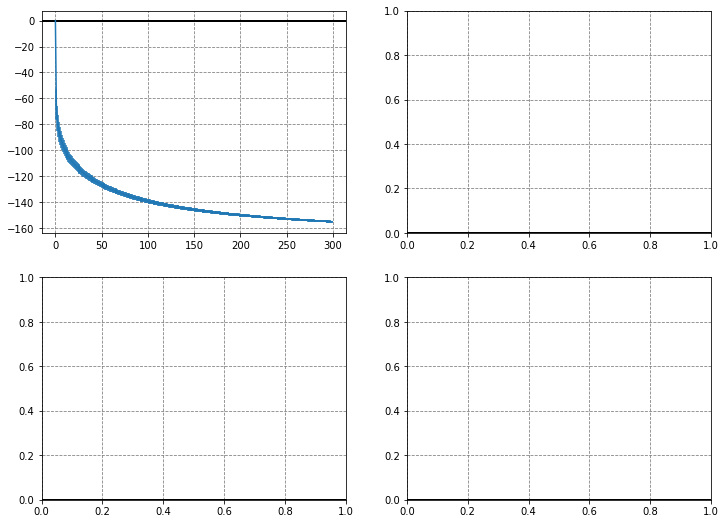

In [19]:
tmp_mu = (mass1*mass2)/(mass1+mass2)
Edata[Edata==0.0] = 1e-10 # To avoid zero-div                                                                              

PhaseShift = np.array([Tmatrix.calc_phase_shift.calc_phase_Sii(Tmat[iconf,:,0,0])[0] for iconf in range(Nconf)])

fig, axe = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

axe[0,0].errorbar(Edata, np.mean(PhaseShift, axis=0), yerr=np.std(PhaseShift, axis=0)*np.sqrt(Nconf-1))
#axe[0,0].set_xlim([-10,10])

for i in range(2):
    for j in range(2):
        axe[i,j].grid(which='major',color='gray',linestyle='--')
        axe[i,j].axhline(0.0, lw=2, color='black')